In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

%matplotlib inline
sns.set()

# Exploración del dataset

---



In [4]:
test_df = pd.read_csv('titanic-test.csv')
train_df = pd.read_csv('titanic-train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.info() # Info general del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


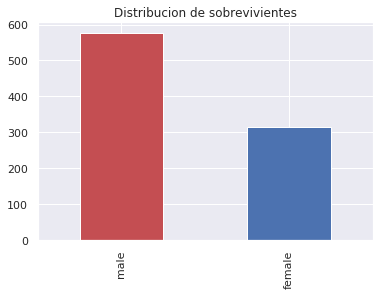

In [6]:
train_df['Sex'].value_counts().plot(kind='bar', color=['r', 'b'])
plt.title('Distribucion de sobrevivientes')
plt.show()

# Data Cleaning

---



In [0]:
label_encoder = preprocessing.LabelEncoder()
encoder_sex = label_encoder.fit_transform(train_df['Sex'])

In [0]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())

In [0]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [0]:
train_predictors = train_df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)

categorical_cols = [cname for cname in train_predictors.columns if 
                      train_predictors[cname].nunique() < 10 and
                      train_predictors[cname].dtype == 'object'
                    ]

In [0]:
numerical_cols = [cname for cname in train_predictors.columns if
                    train_predictors[cname].dtype in ['int64', 'float64']
                  ]

In [0]:
myCols = categorical_cols + numerical_cols

In [0]:
train_predictors = train_predictors[myCols]

In [0]:
dummy_encoded_train_predictors = pd.get_dummies(train_predictors)

In [15]:
dummy_encoded_train_predictors

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [16]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

# Entrenamiento

---



In [0]:
y_target = train_df['Survived'].values
x_features_ones = dummy_encoded_train_predictors.values

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(x_features_ones, y_target, test_size=0.25, random_state=1)

In [22]:
tree_one = tree.DecisionTreeClassifier()
tree_one.fit(x_features_ones, y_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [25]:
# Model Accuracy
tree_one_accuracy = round(tree_one.score(x_features_ones, y_target), 4)
tree_one_accuracy

0.9798

# Visualización del árbol de desición

---



In [28]:
from io import StringIO 
from IPython.display import Image, display
import pydotplus

out = StringIO()
tree.export_graphviz(tree_one, out_file = out)

graph = pydotplus.graph_from_dot_data(out.getvalue())
graph.write_png('titanic.png')

True